# Task 3.2 – Advanced Feature Engineering Methods

A typical approach in Data Science is "featurization of the Universe". This means we could extract and engineer all the features possible for a given problem.

To give an example: In a time series problem, one could use cumulative sums, moving averages with variable window sizes, discrete state changes, average differences, etc. as features, which quickly becomes very large. Alternatively, data source can be so rich that already the raw extraction produces a vast amount of data.

In this case exploratory data analysis is challenging and we need to resort to alternative methods of visualizing and exploring the feature space.

One approach is to reduce the dimensionality of the feature space and poke around in this reduced feature space. A basic technique well-suited for this problem is the Principal Component Analysis which tries to find the directions of most variation in your data set. 

## PCA
Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset is 4 dimensional. We can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

The main use of PCA is to reduce the size of the feature space while retaining as much of the information as possible. 

The Iris dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

![](./data/3_2_iris.png)

In [1]:
import pandas as pd

df = pd.read_csv('./data/3_2_iris.csv')

df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Task 3.2-1

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features (mean = 0 and variance = 1).

In [2]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features]

# Separating out the target
y = df.loc[:,['target']]

# Standardizing the features
x = StandardScaler().fit_transform(x)

#### PCA Projection to 2D

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). We want to project the original data which is 4 dimensional into 2 dimensions. After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

### Task 3.2-2

Apply a [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the standardized data set.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

df_pc = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])

In [4]:
df_pc['target'] = df['target']
df_pc.head()

,PC 1,PC 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Now we are able to plot the two principal components:

In [5]:
import matplotlib.pyplot as plt

colors = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
 
df_pc['target2'] =  df_pc['target'].map(colors)

plt.scatter(x = df_pc['PC 1'], y = df_pc['PC 2'], c = df_pc['target2'], s=50)

#### Explained Variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute `explained_variance_ratio_`, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [6]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

### Task 3.2-3

Calculate the explained variance of 3 principal components.

In [7]:
pca3 = PCA(n_components=3)

pca3.fit_transform(x)

pca3.explained_variance_ratio_.sum()

0.9948480731910938

## FFT

In [8]:
import numpy as np

Create a Test Signal
Using numpy, we can create a signal `s` that contains components at a couple of multiples of a certain base frequency.

In [9]:
t = np.linspace(0, 2*np.pi, 1000, endpoint=True)

s = 50*np.sin(10*np.pi*2*t) + 100*np.sin(25*np.pi*2*t) # Signal

Text(0,0.5,'Amplitude ($Unit$)')

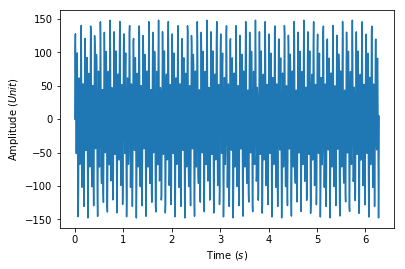

In [10]:
plt.plot(t,s)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')

#### Compute the FFT

That's it:

In [11]:
Y = np.fft.fft(s)

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


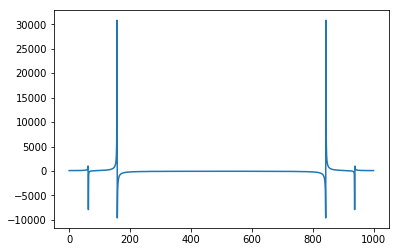

In [12]:
plt.plot(Y)

Hm, looks strange. Something, which is mirrored at the half, right?!

In [13]:
N = int(len(Y)/2)+1
Y[N-4:N+3]

array([-60.24041344+0.45534509j, -60.23878632+0.30355282j,
       -60.23781012+0.15177324j, -60.23748474+0.j        ,
       -60.23781012-0.15177324j, -60.23878632-0.30355282j,
       -60.24041344-0.45534509j])

There is something with imaginary parts (the j) in it. So let’s just take the real part of it with the `abs` attribute. In addition, we ignore the second half of the plot.

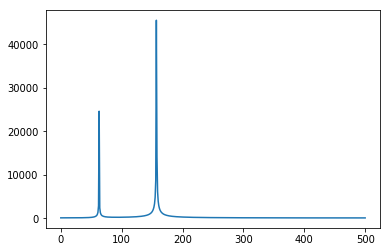

In [14]:
plt.plot(np.abs(Y[:N]))

That looks pretty good. It is called the amplitude spectrum of the time domain signal and was calculated with the Discrete Fourier Transform with the Fast FFT algorithm. But how to get the x-axis to real physical scaled values?

#### x-Axis: The Frequency Axis of the FFT

First, let us determine the timestep, which is used to sample the signal. We made it synthetically, but a real signal has a period (measured every second or every day or something similar). If there is no constant frequency, the FFT can not be used!



In [15]:
dt = t[1] - t[0]
fa = 1.0/dt # scan frequency
print('dt=%.5fs (Sample Time)' % dt)
print('fa=%.2fHz (Frequency)' % fa)

dt=0.00629s (Sample Time)
fa=159.00Hz (Frequency)


Now we need to create a x-Axis vector, which starts from 0.0 and is filled with N (length of half of the FFT signal) values and going all the way to the maximum frequency, which can be reconstructed. This frequency is half of the maximum sampling frequency (fa) and is called the Nyquist-Frequency.

In [16]:
X = np.linspace(0, fa/2, N, endpoint=True)

Text(0.5,0,'Frequency ($Hz$)')

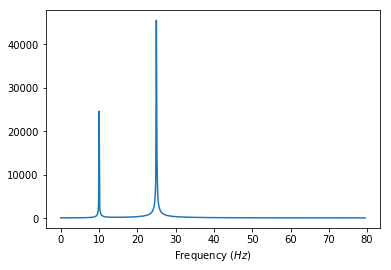

In [17]:
plt.plot(X, np.abs(Y[:N]))
plt.xlabel('Frequency ($Hz$)')

Now the x-Axis is showing us, that we have a peak at exactly these frequencies, from which our synthetically created signal was build of.